In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
from sympy.vector import CoordSys3D
from mpl_toolkits.mplot3d import Axes3D


In [2]:
#let's define fisrt the constants as symbols, in this program E and B are constant in time and omogenous in space so we define them as symbols and not functions 
t, m, q, Ex, Ey, Ez, Bx, By, Bz = smp.symbols('t, m, q, E_x, E_y, E_z, B_x, B_y, B_z')

#let's define the components of E and B vectors
N = CoordSys3D('N') 

E= Ex*N.i + Ey*N.j + Ez*N.k
B= Bx*N.i + By*N.j + Bz*N.k


In [3]:
#now let's define the functions of time: X an y position and the force 
x, y, z = smp.symbols('x, y, z', cls= smp.Function)

x= x(t)
x_d= smp.diff(x, t)
x_dd= smp.diff(x_d, t)

y= y(t)
y_d= smp.diff(y, t)
y_dd= smp.diff(y_d, t)

z= z(t)
z_d= smp.diff(z, t)
z_dd= smp.diff(z_d, t)

#let's define the volcity vector
v= x_d*N.i+ y_d*N.j + z_d*N.k

#let's now define the force
F= q*E+q*v.cross(B)
F

#now let's break down the components of the force 
Fx, Fy, Fz = smp.symbols('F_x, F_y, F_y', cls= smp.Function)
Fx = F.dot(N.i)
Fy = F.dot(N.j)
Fz = F.dot(N.k)



In [4]:
F

(E_x*q + q*(-B_y*Derivative(z(t), t) + B_z*Derivative(y(t), t)))*N.i + (E_y*q + q*(B_x*Derivative(z(t), t) - B_z*Derivative(x(t), t)))*N.j + (E_z*q + q*(-B_x*Derivative(y(t), t) + B_y*Derivative(x(t), t)))*N.k

In [5]:
#now lets build the differential equation of the motion 
E1= Fx-m*x_dd
E2= Fy-m*y_dd
E3= Fz-m*z_dd

In [6]:
E1

E_x*q - m*Derivative(x(t), (t, 2)) + q*(-B_y*Derivative(z(t), t) + B_z*Derivative(y(t), t))

In [7]:
#now let's solve for the second derivative of the expressions above
#this is acutally a non necessay step because the acceleration components are always non mixed with the rest of the variables and fucntions
sols = smp.solve([E1, E2, E3], (x_dd, y_dd, z_dd))
sols[x_dd]

-B_y*q*Derivative(z(t), t)/m + B_z*q*Derivative(y(t), t)/m + E_x*q/m

In [8]:
#now we will break the system of second order differential equation into a system of six first order linear differential equations

dxdt= smp.lambdify(x_d, x_d)
dVxdt= smp.lambdify((m, q, Ex, Ey, Ez, Bx, By, Bz, x_d, y_d, z_d), sols[x_dd])
dydt= smp.lambdify(y_d, y_d)
dVydt= smp.lambdify((m, q, Ex, Ey, Ez, Bx, By, Bz, x_d, y_d, z_d), sols[y_dd])
dzdt= smp.lambdify(z_d, z_d)
dVzdt= smp.lambdify((m, q, Ex, Ey, Ez, Bx, By, Bz, x_d, y_d, z_d), sols[z_dd])


In [9]:
#now let's define the function necessary to solve the system of diff equations 
def dSdt(S, t):

    x, Vx, y, Vy, z, Vz = S
    return[
        dxdt(Vx),
        dVxdt(m, q, Ex, Ey, Ez, Bx, By, Bz,Vx, Vy, Vz),
        dydt(Vy),
        dVydt(m, q, Ex, Ey, Ez, Bx, By, Bz,Vx, Vy, Vz),
        dzdt(Vz),
        dVzdt(m, q, Ex, Ey, Ez, Bx, By, Bz,Vx, Vy, Vz)
    ] 


In [10]:
t = np.linspace(0, 10, 1000)
m=1
q=1
Ex=1
Ey=0
Ez=0
Bx=0
By=0
Bz=-1

In [11]:
# let's define the initial condition
# in order: x position, x veocity, y position, y velocity, z position, z velocity
# in this case the charge has no initial velocity
ans= odeint(dSdt, y0=[0,0,0,0,0,0], t=t)
ans.T[1]

array([ 0.        ,  0.01000983,  0.02001869,  0.03002553,  0.04002935,
        0.05002917,  0.06002397,  0.07001276,  0.07999453,  0.08996829,
        0.09993303,  0.10988776,  0.11983147,  0.12976319,  0.13968189,
        0.14958661,  0.15947633,  0.16935008,  0.17920685,  0.18904567,
        0.19886555,  0.2086655 ,  0.21844455,  0.2282017 ,  0.237936  ,
        0.24764645,  0.25733208,  0.26699193,  0.27662503,  0.2862304 ,
        0.2958071 ,  0.30535416,  0.31487062,  0.32435553,  0.33380794,
        0.34322691,  0.35261148,  0.36196072,  0.3712737 ,  0.38054947,
        0.38978711,  0.3989857 ,  0.40814431,  0.41726202,  0.42633792,
        0.43537111,  0.44436066,  0.4533057 ,  0.46220531,  0.47105862,
        0.47986472,  0.48862274,  0.4973318 ,  0.50599102,  0.51459955,
        0.52315651,  0.53166106,  0.54011233,  0.54850948,  0.55685168,
        0.56513807,  0.57336784,  0.58154016,  0.58965421,  0.59770918,
        0.60570425,  0.61363864,  0.62151153,  0.62932215,  0.63

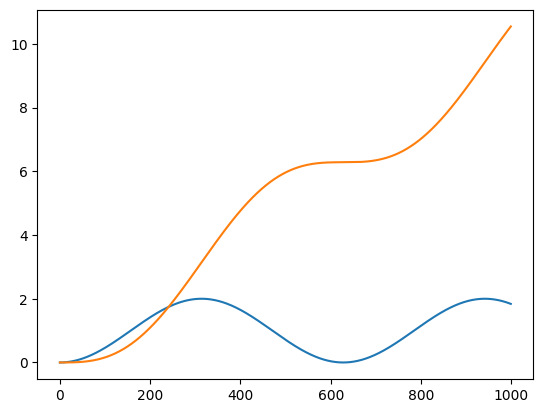

In [12]:
#let's plot the x and y component of motion
plt.plot(ans.T[0]) #blue 
plt.plot(ans.T[2]) #orange 

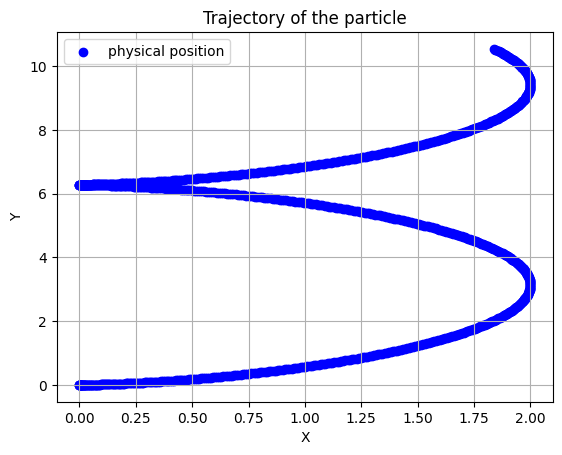

In [13]:
#let's plot the trajectory on the x-y plane, in this case there is no component of the  motion on the z axis 

plt.scatter(ans.T[0], ans.T[2], color='blue', label='physical position')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory of the particle')


plt.grid(True)


plt.legend()


plt.show()

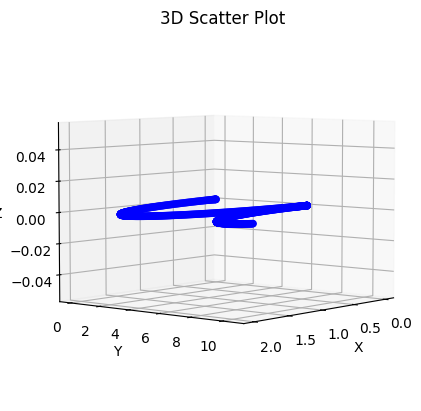

In [14]:
# Let's now create a 3D plot of the motion
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(ans.T[0], ans.T[2], ans.T[4], c='b', marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# this is to change the prospective: elevationa an azimuthal angles
ax.view_init(elev=5, azim=40)  
plt.draw()




plt.show()

